In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pomegranate import *

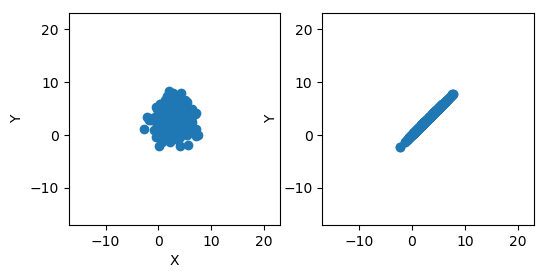

In [2]:
mean = [3, 3]
cov = [[3, 0],[0,3]]
x,y = sample = np.random.multivariate_normal(mean,cov,500).T

fig, ax = plt.subplots(1,2,dpi = 100,)
ax[0].scatter(x,y)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
t = 20
ax[0].set_xlim(mean[0]-t,mean[0]+t)
ax[0].set_ylim(mean[1]-t,mean[1]+t)
ax[0].set_aspect(1.0)

mean = [3, 3]
a = 3
cov = [[3, a],[a,3]]
x,y = sample = np.random.multivariate_normal(mean,cov,500).T

ax[1].scatter(x,y)
# ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_xlim(mean[0]-t,mean[0]+t)
ax[1].set_ylim(mean[1]-t,mean[1]+t)
ax[1].set_aspect(1.0)
# fig.set_tight_layout('w_pad')


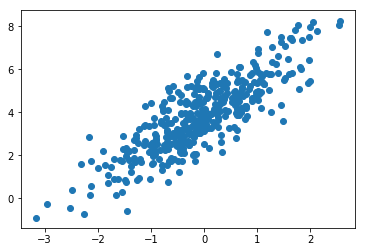

In [3]:
mean = [0, 4]
a = 1.5
cov = [[1, a],[a, 3]]
x,y = sample = np.random.multivariate_normal(mean,cov,400).T

plt.scatter(x,y)


sample = np.random.multivariate_normal(mean,cov,400)

In [4]:
MultivariateGaussianDistribution.from_samples(sample)

{
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            0.012309391010328942,
            4.061417572379434
        ],
        [
            [
                0.9892968221206029,
                1.434563420546028
            ],
            [
                1.434563420546028,
                2.8360029383214194
            ]
        ]
    ],
    "frozen" :false
}

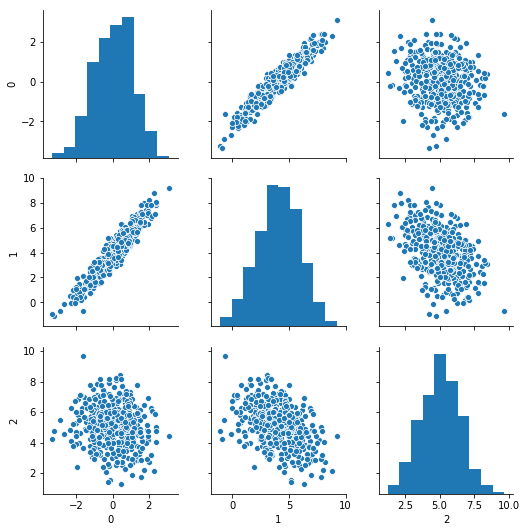

In [5]:
import seaborn as sns
import pandas as pd
mean = [0, 4, 5]
a = 1.625
b = -0.1
c = -1
cov = [[1, a, b],[a, 3, c], [b, c, 2]]
x,y,z = sample = np.random.multivariate_normal(mean,cov,400).T

#plt.scatter(x,y)


sample = np.random.multivariate_normal(mean,cov,400)
sns.pairplot(pd.DataFrame(sample))

In [6]:
print(cov)

[[1, 1.625, -0.1], [1.625, 3, -1], [-0.1, -1, 2]]


In [7]:
MultivariateGaussianDistribution.from_samples(sample)

{
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            0.04384852759692425,
            4.04009442608672,
            5.058792030896453
        ],
        [
            [
                1.1418215399312213,
                1.8966327433153678,
                -0.19411094575593446
            ],
            [
                1.8966327433153678,
                3.5047291569751313,
                -1.1407270494646717
            ],
            [
                -0.19411094575593446,
                -1.1407270494646717,
                1.9661144518547098
            ]
        ]
    ],
    "frozen" :false
}

In [8]:
a = np.int32(1.0)
a.astype('complex128')

(1+0j)

In [9]:
MultivariateGaussianDistribution([1,0],[[1,0],[0,1]])

{
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            1.0,
            0.0
        ],
        [
            [
                1.0,
                0.0
            ],
            [
                0.0,
                1.0
            ]
        ]
    ],
    "frozen" :false
}

In [10]:
def create_sample():
    means = [[25,2],[4,10]]
    cov = [ [[1,0],[0,1]], [ [0.1,0],[0,10] ] ]
    m1 = MultivariateGaussianDistribution(means[0], cov[0])
    
    sample_1 = m1.sample(1000)
    m2 = MultivariateGaussianDistribution(means[1], cov[1])
    sample_2 = m2.sample(1000)
    X = np.r_[sample_1, sample_2]
    print(X.shape)
    return X

Первая компонента
26.002055293643046 1.9979213610003324
Вторая компонента
5.0234095396807845 9.98125596547849
(1000, 2)
(1000, 2) (1000, 2)
X: (2000, 2)


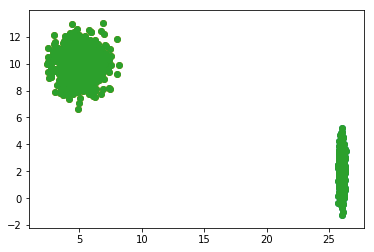

In [11]:
means = [[0,2],[2,5]]
cov = [ [[1,0],[0,1]], [ [1,0],[0,2] ] ]
cov = [ [[1,0],[0,1]], [ [1,0],[0,1] ] ]

m1 = MultivariateGaussianDistribution(means[0], cov[0])
sample_1 = m1.sample(1000)

m2 = MultivariateGaussianDistribution(means[1], cov[1])
sample_2 = m2.sample(1000)

size = 1000
#1
h1 = np.ones((size,))*np.random.normal(1,0.1,size) + 25
h2 = np.random.normal(2,1,1000)
sample_1 = np.vstack((h1, h2)).T

print('Первая компонента')
print(sample_1[:,0].mean(),sample_1[:,1].mean())
#2
h1 = np.ones((size,))*np.random.normal(1,1,size) + 4
h2 = np.random.normal(10,1,size)
sample_2 = np.vstack((h1, h2)).T

print('Вторая компонента')
print(sample_2[:,0].mean(),sample_2[:,1].mean())
print(sample_2.shape)
print(sample_1.shape, sample_2.shape)
fig = plt.figure()
plt.scatter(sample_1[:,0], sample_1[:,1])
plt.scatter(sample_2[:,0], sample_2[:,1])
X = np.r_[sample_1, sample_2]
print('X:',X.shape)
plt.scatter(X[:,0],X[:,1])

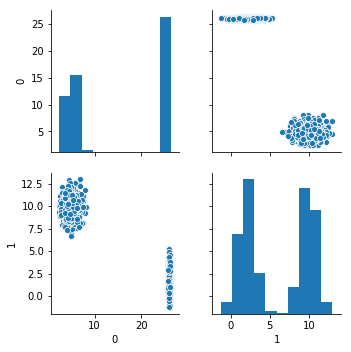

In [12]:
sns.pairplot(pd.DataFrame(X))

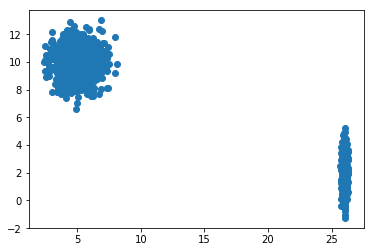

In [13]:
plt.scatter(X[:,0],X[:,1])

In [14]:
X

array([[25.97059258,  2.36600824],
       [26.06601512,  1.58336422],
       [26.14775666,  4.47341731],
       ...,
       [ 5.08695095, 11.25149311],
       [ 3.72934835, 11.4498701 ],
       [ 5.43813305, 10.68976017]])

In [15]:
def show_model(X, a=10, num = 20):
    """
    num: число точек на промежутке 
    """
    print(X)
    gmm = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution,2,X=X)
    print(gmm.distributions)
    
    mean = [X[:,0].mean(), X[:,1].mean()]
    x1 = np.linspace(-a + mean[0],a+mean[0], num)
    x2 = np.linspace(-a + mean[1],a+mean[1], num)
    
    xx, yy = np.meshgrid(x1,x2)
    print('xx: ', xx.shape)
    t = np.c_[ xx.ravel(), yy.ravel()]
    print(xx[:5])
    print(yy[:5])
    print('t')
    print(t)
    print('Тестовая выборка ',t.shape)

    fig = plt.figure(dpi = 120)
    

    #Предсказание для сетки
    z = gmm.predict(t)
    plt.scatter(t[:,0],t[:,1],s = 1, c = z)

    z = gmm.predict(X)
    print('X:',X.shape,'y_pred:',z.shape)
    print(X)
#     plt.scatter(X[:,0],X[:,1])

    plt.scatter(X[:,0],X[:,1],c = z)
    


    for dist in gmm.distributions:
        plt.scatter(dist.parameters[0][0], dist.parameters[0][1],c='r')
        plt.scatter(dist.parameters[0][1], dist.parameters[0][0],c='r')

        print('means: ',dist.parameters[0][0], dist.parameters[0][1])
    
    fig = plt.figure()
    plt.scatter(X[:,0],X[:,1])

    # plt.contourf(xx,yy,z)
    # plt.contour(t[:,0],t[:,1],c=z)

[[25.97059258  2.36600824]
 [26.06601512  1.58336422]
 [26.14775666  4.47341731]
 ...
 [ 5.08695095 11.25149311]
 [ 3.72934835 11.4498701 ]
 [ 5.43813305 10.68976017]]
[{
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            25.99899440716888,
            26.005116180133356
        ],
        [
            [
                0.009753467192950447,
                -0.00012803418498486612
            ],
            [
                -0.00012803418498486612,
                0.010721911697170955
            ]
        ]
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            5.690836631437466,
            5.644221286233211
        ],
        [
            [
                11.702792993734485,
                10.805575045870022
            ],
            [
                10.805575045870022,
                11.876373653521464
          

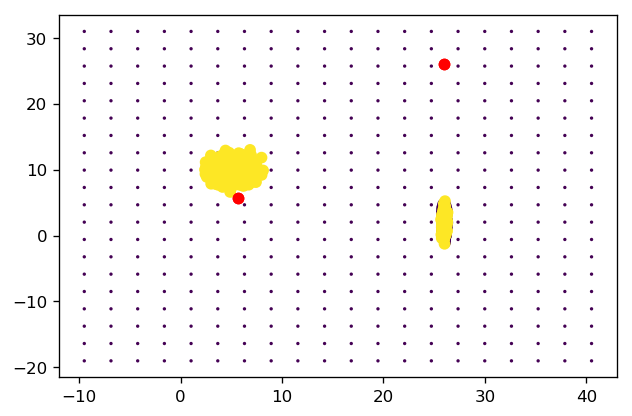

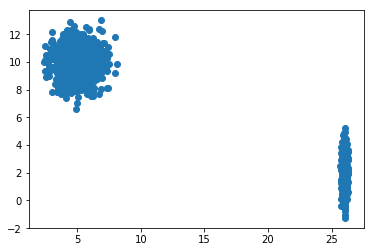

In [16]:
show_model(X,25)

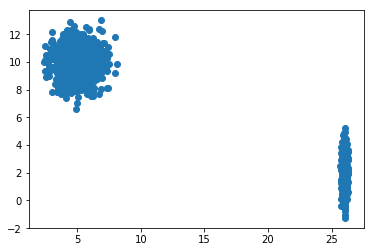

In [17]:
X = np.r_[sample_1, sample_2]
plt.scatter(X[:,0],X[:,1])

(2000, 2)


array([[24.92650279,  1.14884044],
       [24.7485104 ,  1.85749965],
       [25.15253307,  0.45409418],
       ...,
       [ 4.58798428,  5.67978559],
       [ 4.2470809 , 11.59529052],
       [ 3.29476964,  8.84649202]])

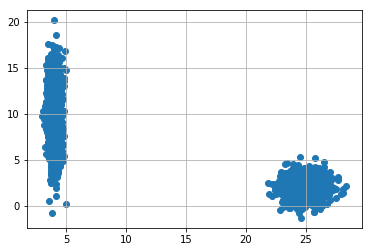

In [18]:
X = create_sample()
plt.scatter(X[:,0],X[:,1])
plt.grid()
X

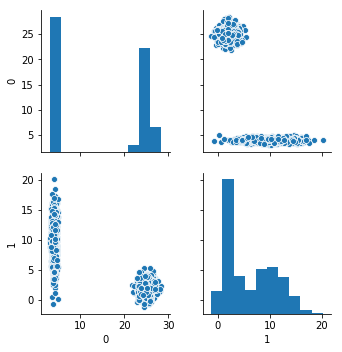

In [19]:
sns.pairplot(pd.DataFrame(X))

[[24.92650279  1.14884044]
 [24.7485104   1.85749965]
 [25.15253307  0.45409418]
 ...
 [ 4.58798428  5.67978559]
 [ 4.2470809  11.59529052]
 [ 3.29476964  8.84649202]]
[{
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            24.991299839983363,
            1.9899961398939199
        ],
        [
            [
                0.9938676544139162,
                0.020103812894121803
            ],
            [
                0.020103812894121803,
                0.9543537354726331
            ]
        ]
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "name" :"MultivariateGaussianDistribution",
    "parameters" :[
        [
            3.993297699297064,
            10.033639964252488
        ],
        [
            [
                0.09908081818126448,
                -0.01128559987126937
            ],
            [
                -0.01128559987126937,
                9.602503784649205
            ]


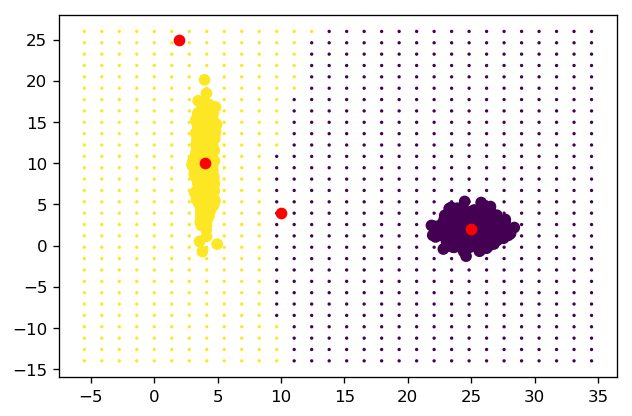

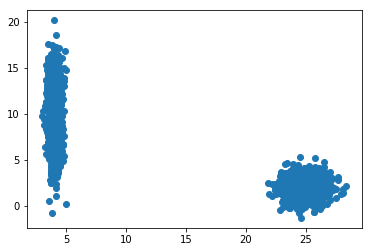

In [20]:
show_model(X,20,30)